In [7]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
df = pd.read_csv("cp_new_reg1.csv")

In [9]:
df.head()
df

1.7592772277227688

In [6]:
df.shape

(248, 20)

In [7]:
print(df.corr())

                                branch-load-misses  branch-misses  \
branch-load-misses                        1.000000       0.997294   
branch-misses                             0.997294       1.000000   
iTLB-load-misses                          0.651059       0.670469   
dTLB-load-misses                         -0.635413      -0.644030   
dTLB-store-misses                        -0.077108      -0.074008   
L1-icache-load-misses                     0.501392       0.520183   
L1-dcache-load-misses                    -0.335027      -0.351782   
l1d_pend_miss.pending_cycles             -0.687083      -0.700913   
l2_rqsts.code_rd_miss                     0.582008       0.596263   
l2_rqsts.all_demand_miss                  0.325651       0.338760   
l2_rqsts.demand_data_rd_miss             -0.505206      -0.505700   
l1d_pend_miss.pending_cycles.1           -0.720426      -0.725721   
l2_rqsts.code_rd_miss.1                   0.605713       0.613994   
l2_rqsts.rfo_miss                 

In [8]:
print(df.describe())

       branch-load-misses  branch-misses  iTLB-load-misses  dTLB-load-misses  \
count        2.480000e+02   2.480000e+02        248.000000         248.00000   
mean         2.552328e+06   2.551362e+06      19352.524194      120721.66129   
std          1.074739e+06   1.065807e+06      15549.653266       79518.67799   
min          4.290880e+05   4.284110e+05        967.000000        3794.00000   
25%          1.512355e+06   1.496120e+06       4725.500000       60597.50000   
50%          2.870543e+06   2.920817e+06      18323.000000       86047.00000   
75%          3.398685e+06   3.418612e+06      29453.750000      166357.25000   
max          4.468828e+06   4.230028e+06      72566.000000      426873.00000   

       dTLB-store-misses  L1-icache-load-misses  L1-dcache-load-misses  \
count         248.000000           2.480000e+02           2.480000e+02   
mean        21013.697581           4.756636e+06           8.079630e+06   
std         17091.790218           3.167415e+06          

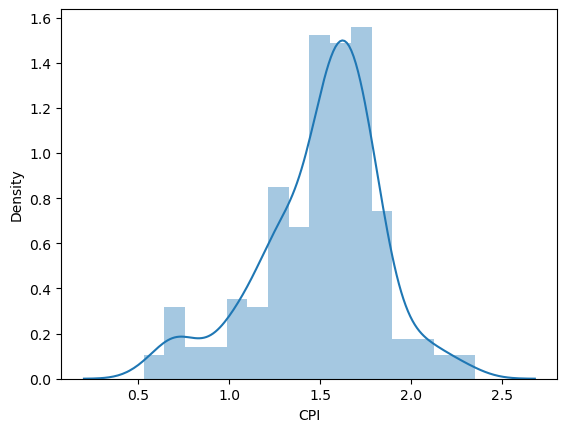

In [13]:
y
sns.distplot(df['CPI']);

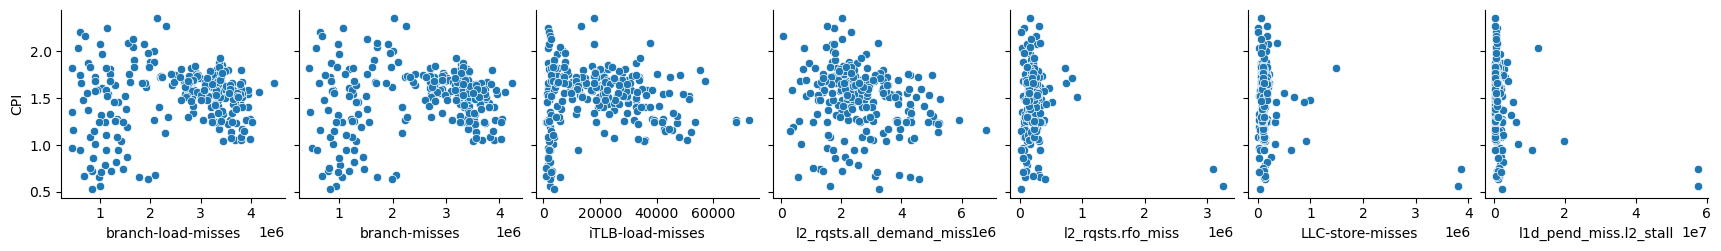

In [14]:
sns.pairplot(df, x_vars=li, y_vars='CPI', aspect=1, kind='scatter')
plt.show()

<Axes: >

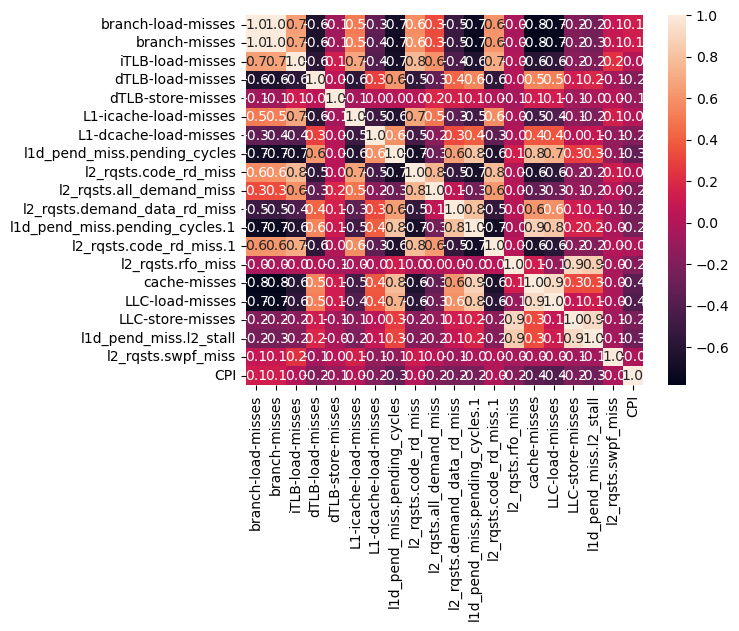

In [15]:
plt.show()
sns.heatmap(df.corr(), annot=True, fmt=".1f")

In [9]:
li=['branch-load-misses', 'branch-misses', 'iTLB-load-misses', 'l2_rqsts.all_demand_miss', 'l2_rqsts.rfo_miss', 'LLC-store-misses', 'l1d_pend_miss.l2_stall']

In [10]:
X = df[li]

y = df['CPI']

In [12]:
from sklearn.preprocessing import minmax_scale
X=minmax_scale(X)
y = minmax_scale(y)
from statistics import mean
mean(y)


0.5345179014533853

In [16]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [17]:
y_train.shape

(198,)

In [18]:
y_test.shape

(50,)

In [21]:
from sklearn.linear_model import Ridge
reg_model = Ridge(alpha=0.9).fit(X_train, y_train)


In [3]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(reg_model.coef_)


Intercept: 0.5940633426114835
[
 ('branch-load-misses', 0.015392608388492152),
 ('branch-misses', -0.276434059845705),
 ('iTLB-load-misses', 0.03439030853546916),
 ('l2_rqsts.all_demand_miss', 0.384734298904671),
 ('L1-icache-misses', 0.5209544973513485),
 ('LLC-store-misses', 0.06925955480381608),
 ('l2_rqsts.rfo_miss', 0.3867825954856685),
]


In [24]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [25]:
print("Prediction for test set: {}".format(y_pred))
print()
print("Prediction for train set: {}".format(x_pred))

Prediction for test set: [0.45719097 0.50654304 0.58544157 0.49480126 0.56958469 0.52899739
 0.49777022 0.47605293 0.56357886 0.57842653 0.49828837 0.5527947
 0.54042658 0.50082337 0.58508488 0.55850144 0.50650722 0.51394952
 0.53371919 0.61195854 0.55157367 0.55527138 0.59105154 0.52120509
 0.51317288 0.56033875 0.21940952 0.57761706 0.57724917 0.63728849
 0.41652921 0.56029836 0.51310015 0.64285559 0.57193964 0.48612124
 0.5087427  0.48059095 0.59899496 0.60775413 0.59822645 0.50194804
 0.60649003 0.63780153 0.42623112 0.5836958  0.48921683 0.6032462
 0.39093112 0.18181389]

Prediction for train set: [0.52778979 0.59912447 0.57026884 0.60800864 0.38355153 0.4624356
 0.35262086 0.5062967  0.49152967 0.57581536 0.42400463 0.53003787
 0.44440054 0.62225547 0.53269026 0.49595906 0.55770897 0.52085933
 0.5566188  0.46980727 0.53318779 0.45259206 0.57406417 0.52081766
 0.51595926 0.56691599 0.53338825 0.5329413  0.53339743 0.57424357
 0.60619044 0.48405924 0.56166836 0.46625273 0.67143761 

In [26]:
reg_model_diff = pd.DataFrame({'Actual CPI value': y_test, 'Predicted CPI value': y_pred , '  Residuals': y_test-y_pred})
reg_model_diff
reg_model_diff.to_csv('residual.csv',index=False)
reg_model_diff


,Actual CPI value,Predicted CPI value,Residuals
0,0.395604,0.457191,-0.061587
1,0.318681,0.506543,-0.187862
2,0.692308,0.585442,0.106866
3,0.500000,0.494801,0.005199
4,0.467033,0.569585,-0.102552
5,0.626374,0.528997,0.097376
6,0.637363,0.497770,0.139592
7,0.538462,0.476053,0.062409
8,0.835165,0.563579,0.271586
9,0.527473,0.578427,-0.050954


In [1]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r_squared = reg_model.score(X, y)


print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R^2 value :', r_squared)
print('F-ststistic value : ' , r2/mse)


Mean Absolute Error: 0.124986001845761
Mean Square Error: 0.027513906207420016
Root Mean Square Error: 0.1558731630114408
R^2 value: 0.5817143070459561
F-statistic value: 8.028702786182636


In [2]:
#display adjusted R-squared
1 - (1-reg_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)


0.5578476410014631


In [4]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
p_values=model.summary2().tables[1]['P>|t|']
p_values

4.331623e-30
0.6941262
0.7783048
0.11437
0.05537438
0.04575545
0.0001443117
0.003628322
Name: P>|t|, dtype: float64
